<a href="https://colab.research.google.com/github/Yewon9/AIB_Project_GameAnalysis/blob/main/section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
game = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', index_col = 0)
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# EDA

In [3]:
game.shape

(16598, 9)

In [4]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [5]:
game.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

Year
- 0 <= Year < 20 -> 2000년대로 변경
- 80 <= Year < 100 -> 1900년대로 변경
- 결측지 271개 존재 -> 평균값으로 대체
- float에서 int로 변환

In [6]:
game['Year'].describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [7]:
def year_19_20(data):
  if 0 <= data < 20:
    data = data + 2000
    return data
  elif 80 <= data < 100:
    data = data + 1900
    return data
  else:
    return data

game['Year'] = game.Year.apply(year_19_20)

In [8]:
game['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [9]:
game[game['Year'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03


In [10]:
game = game.fillna(game.mean())
game[game['Year'].isnull()]

<ipython-input-10-05eaa40882b1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  game = game.fillna(game.mean())


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [11]:
game['Year'] = game['Year'].astype(int)

In [12]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16598 non-null  object
 1   Platform     16598 non-null  object
 2   Year         16598 non-null  int64 
 3   Genre        16548 non-null  object
 4   Publisher    16540 non-null  object
 5   NA_Sales     16598 non-null  object
 6   EU_Sales     16598 non-null  object
 7   JP_Sales     16598 non-null  object
 8   Other_Sales  16598 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


Genre
- 결측치 50개 존재 -> 임의의 값인 'etc'로 대체

In [13]:
game[game['Genre'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
51,Ape Escape: On the Loose,PSP,2005,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
409,NBA Ballers,XB,2004,NaN,Midway Games,0.37,0.11,0,0.02
1329,NFL Street,XB,2004,NaN,Electronic Arts,0.49,0.15,0,0.02
1583,SingStar Singalong With Disney,PS2,2008,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1972,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170K,4.05,4.34,0.79


In [14]:
game['Genre'] = game['Genre'].fillna('etc')
game[game['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


Publisher
- 결측치 58개 존재 -> 임의의 값인 'etc'로 대체

In [15]:
game[game['Publisher'].isnull()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
273,UK Truck Simulator,PC,2010,Simulation,NaN,0,0.03,0,0
1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.17,0.06,0,0
1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004,Misc,NaN,0.12,0.04,0,0
1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.16,0.06,0,0
1880,Monster Hunter Frontier Online,PS3,2006,Role-Playing,NaN,0,0,0.05,0


In [16]:
game['Publisher'] = game['Publisher'].fillna('etc')
game[game['Publisher'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


Sales
- .sample을 통해서 데이터를 확인한 결과 기본 단위가 M이라고 판단
- 데이터에 단위 M이 있을 경우, M 삭제
- 데이터에 단위 K가 있을 경우, K 삭제 후 1000으로 나눔
- 데이터 타입 float형으로 변환

In [17]:
def sales(data):
  if 'M' in data:
    data = data.replace('M', '')
    return float(data)

  elif 'K' in data:
    data = data.replace('K', '')
    data = float(data)
    data = data / 1000
    return data

  else:
    return float(data)

In [18]:
game['NA_Sales'] = game['NA_Sales'].apply(sales)

In [19]:
game['EU_Sales'] = game['EU_Sales'].apply(sales)

In [20]:
game['JP_Sales'] = game['JP_Sales'].apply(sales)

In [21]:
game['Other_Sales'] = game['Other_Sales'].apply(sales)

In [48]:
game['Sum_Sales'] = game['NA_Sales'] + game['EU_Sales'] + game['JP_Sales'] + game['Other_Sales']
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# 지역에 따라서 선호하는 게임 장르가 다를까

- 지역은 북미, 유럽, 일본, 기타로 구분
- 각 지역별 가장 선호하는 게임의 장르 파악 (bar plot)
- 전체적으로 가장 선호하는 게임의 장르 파악 (bar plot)

In [22]:
import matplotlib.pyplot as plt

In [49]:
NA = game.groupby('Genre').sum()['NA_Sales'].reset_index()
EU = game.groupby('Genre').sum()['EU_Sales'].reset_index()
JP = game.groupby('Genre').sum()['JP_Sales'].reset_index()
Other = game.groupby('Genre').sum()['Other_Sales'].reset_index()
Sum = game.groupby('Genre').sum()['Sum_Sales'].reset_index()

In [50]:
Genre_area = NA.merge(EU, how = "inner", on = ['Genre'])
Genre_area = Genre_area.merge(JP, how = "inner", on = ['Genre'])
Genre_area = Genre_area.merge(Other, how = "inner", on = ['Genre'])
Genre_area = Genre_area.merge(Sum, how = "inner", on = ['Genre'])
Genre_area

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,Action,874.81,522.16,157.90,186.45,1741.32
1,Adventure,105.66,64.05,51.95,16.81,238.47
2,Fighting,223.20,101.22,87.34,36.64,448.40
3,Misc,408.05,212.36,105.27,74.04,799.72
4,Platform,446.44,201.61,130.65,51.53,830.23
5,Puzzle,123.35,50.73,56.87,12.52,243.47
6,Racing,357.19,237.10,56.40,77.10,727.79
7,Role-Playing,319.54,183.58,344.95,56.96,905.03
8,Shooter,581.92,313.05,38.28,102.65,1035.90
9,Simulation,182.96,113.35,63.70,31.48,391.49


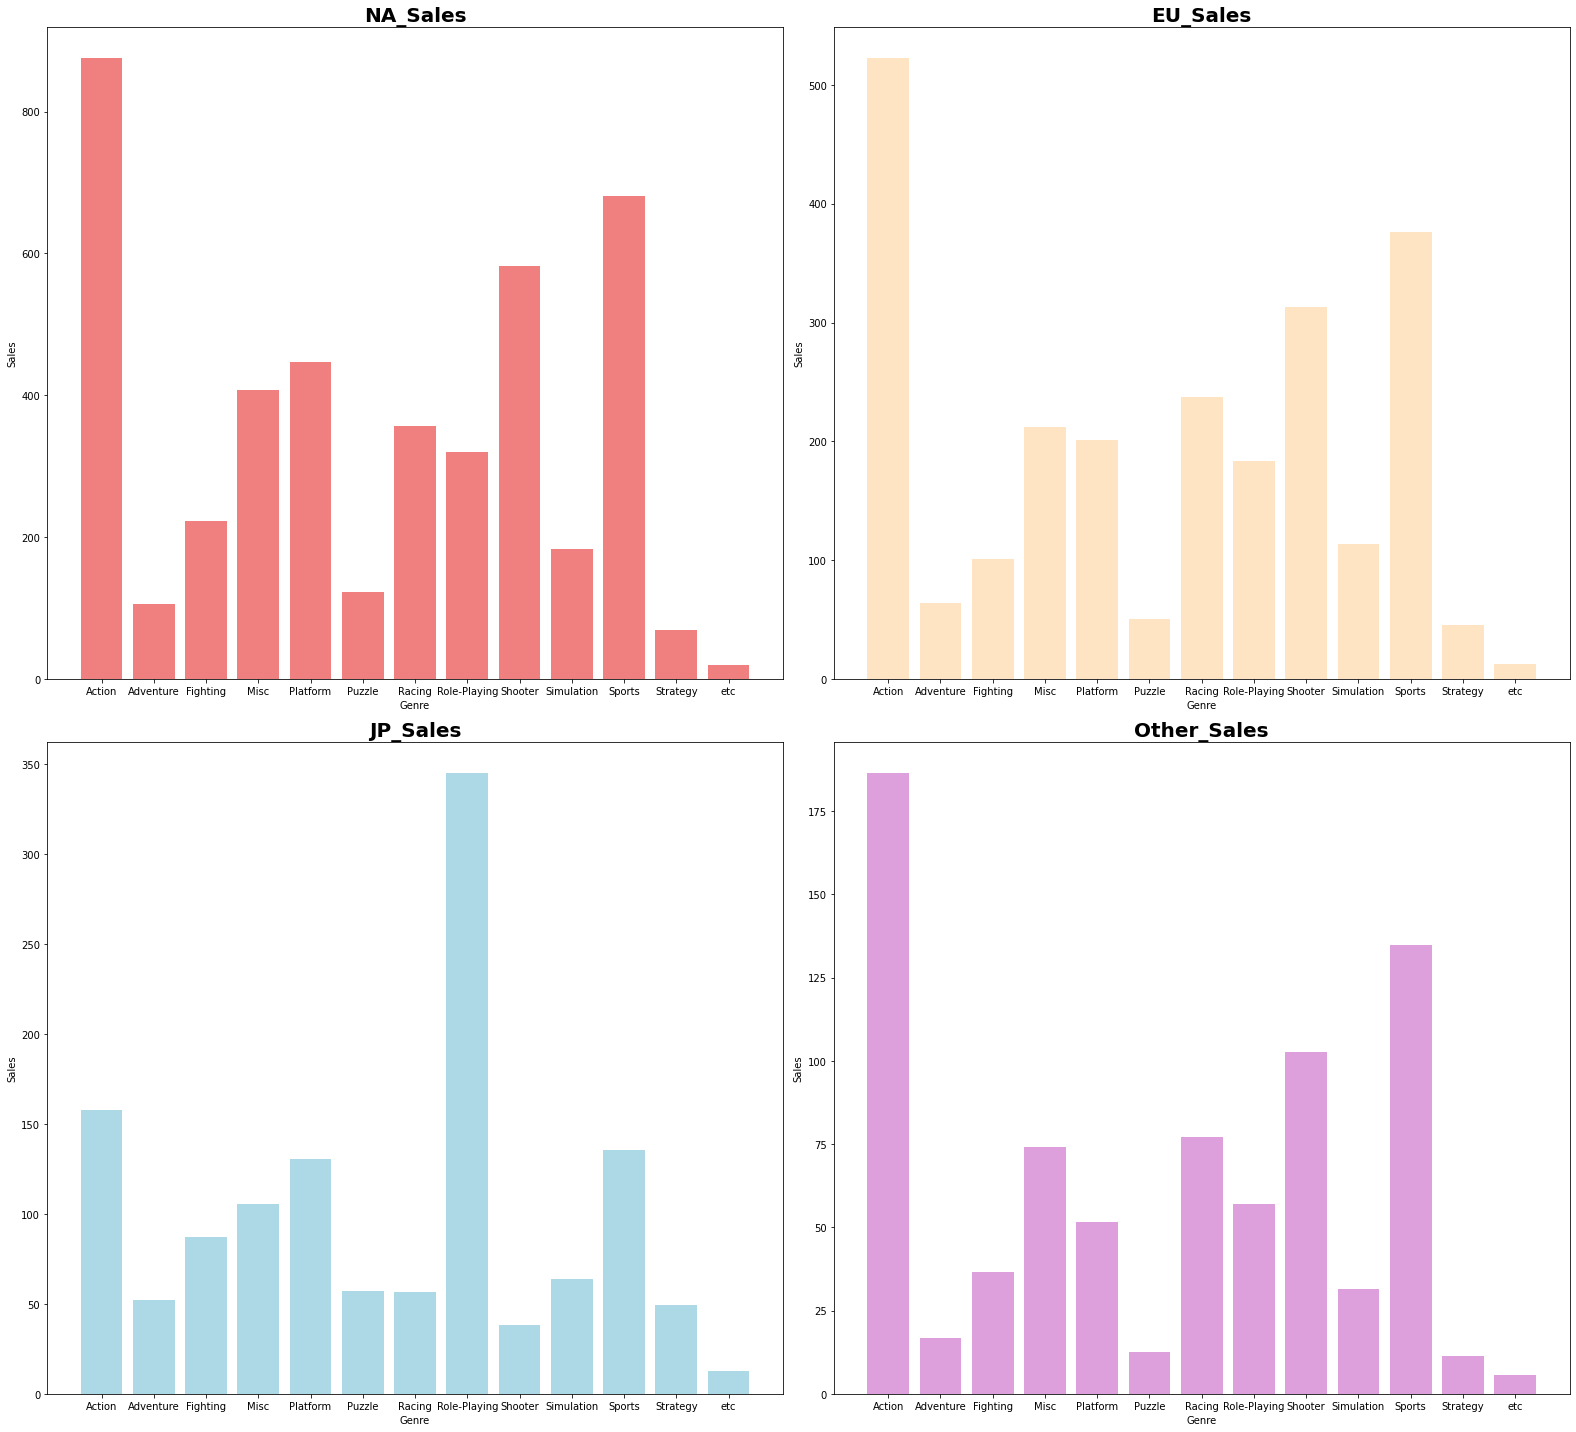

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(22, 20))

plt.subplot(2, 2, 1)
plt.bar(Genre_area['Genre'], Genre_area['NA_Sales'], color = "lightcoral")
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("NA_Sales", fontsize = 20, fontweight = 'bold')

plt.subplot(2, 2, 2)
plt.bar(Genre_area['Genre'], Genre_area['EU_Sales'], color = "bisque")
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("EU_Sales", fontsize = 20, fontweight = 'bold')

plt.subplot(2, 2, 3)
plt.bar(Genre_area['Genre'], Genre_area['JP_Sales'], color = "lightblue")
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("JP_Sales", fontsize = 20, fontweight = 'bold')

plt.subplot(2, 2, 4)
plt.bar(Genre_area['Genre'], Genre_area['Other_Sales'], color = "plum")
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("Other_Sales", fontsize = 20, fontweight = 'bold')

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sum_Sales')

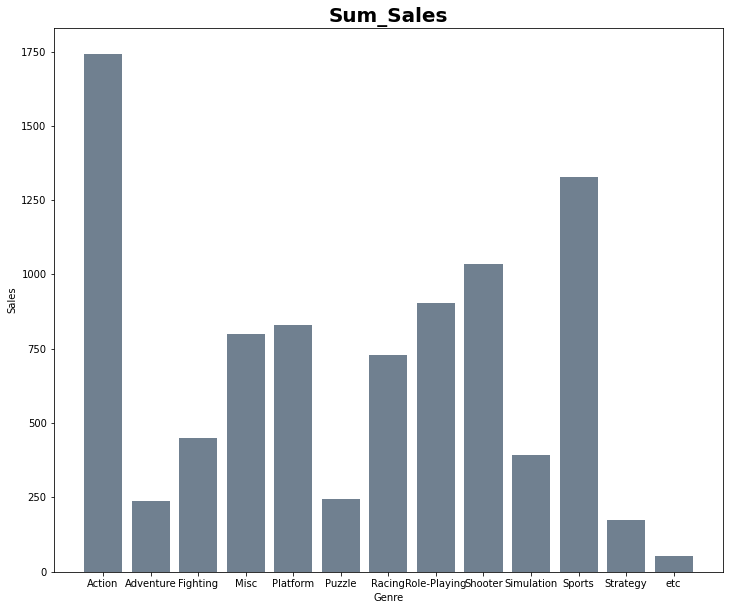

In [65]:
plt.figure(figsize = (12, 10))
plt.bar(Genre_area['Genre'], Genre_area['Sum_Sales'], color = "slategray")
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("Sum_Sales", fontsize = 20, fontweight = 'bold')

NA(북미) : Action, Sports, Shooter 순서로 출고량이 높음 </br>
EU(유럽) : Action, Sports, Shooter 순서로 출고량이 높음 </br>
JP(일본) : Role-Playing, Action, Sports 순서로 출고량이 높음 </br>
Other(기타) : Action, Sports, Shooter 순서로 출고량이 높음 </br>
Sum(총합) : Action, Sprots, Shooter 순서로 출고량이 높음

지역별로 선호하는 게임의 장르가 같다고 생각함 </br>
4개의 지역에서 Action, Sports 장르가 모두 상위권을 차지함 </br>
Strategy, Adventure, Puzzle 장르는 4개의 지역 모두에서 하위권을 차지함 </br>
지역별로 시각화한 그래프와 총합을 시각화한 그래프를 비교할 때, 대부분 유사한 그래프 모양을 가지고 있음

# 연도별 게임의 트렌드가 있을까

- line plot으로 연도별 출고량 변화 확인
- line plot으로 연도별 장르별 전체 지역의 출고량 변화 확인
- 트렌드는 전체 출고량 + 장르별 출고량

In [26]:
import seaborn as sns

In [28]:
Genre_year = game.loc[:, ['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sum_Sales']]
Genre_year.head()

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
1,2008,Action,0.04,0.00,0.00,0.00,0.04
2,2009,Action,0.17,0.00,0.00,0.01,0.18
3,2010,Adventure,0.00,0.00,0.02,0.00,0.02
4,2010,Misc,0.04,0.00,0.00,0.00,0.04
5,2010,Platform,0.12,0.09,0.00,0.04,0.25


In [29]:
year_sales = Genre_year.groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sum_Sales']].reset_index()
year_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,1980,10.59,0.67,0.00,0.12,11.38
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

Text(0.5, 1.0, 'Sales')

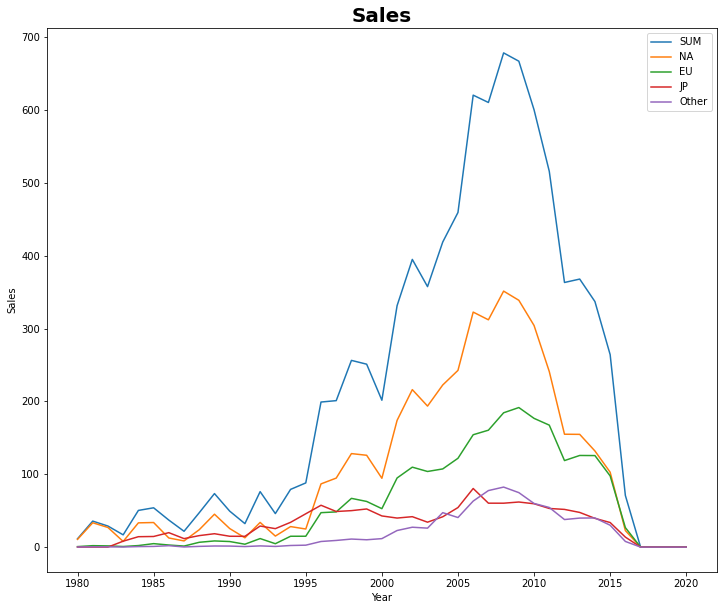

In [66]:
plt.figure(figsize = (12, 10))

sns.lineplot(year_sales['Year'], year_sales['Sum_Sales'], label = 'SUM')
sns.lineplot(year_sales['Year'], year_sales['NA_Sales'], label = 'NA')
sns.lineplot(year_sales['Year'], year_sales['EU_Sales'], label = 'EU')
sns.lineplot(year_sales['Year'], year_sales['JP_Sales'], label = 'JP')
sns.lineplot(year_sales['Year'], year_sales['Other_Sales'], label = 'Other')

plt.ylabel("Sales")
plt.title("Sales", fontsize = 20, fontweight = 'bold')

In [31]:
year_genre = Genre_year.groupby(['Year', 'Genre']).sum()['Sum_Sales'].reset_index()
year_genre.head()

,Year,Genre,Sum_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1980,etc,0.50


Text(0.5, 1.0, 'Sales')

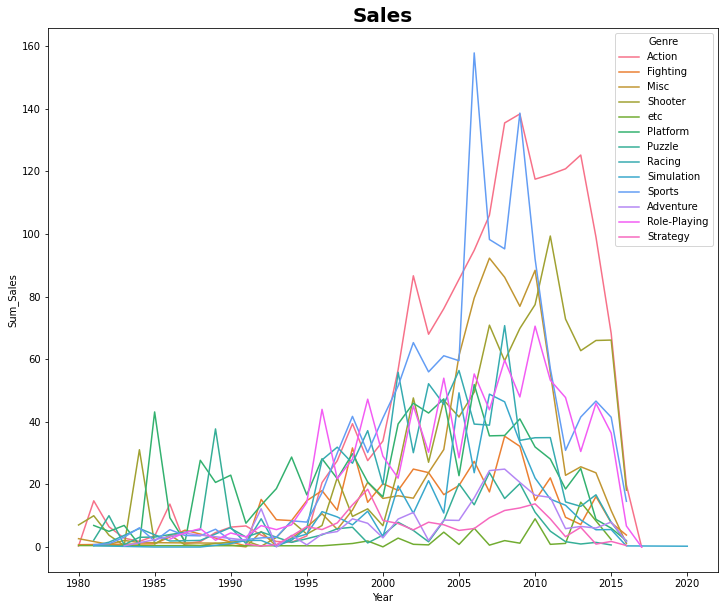

In [67]:
plt.figure(figsize = (12, 10))

sns.lineplot(x = year_genre['Year'], y = year_genre['Sum_Sales'], hue = year_genre['Genre'])

plt.title("Sales", fontsize = 20, fontweight = 'bold')

1995년 ~ 2010년 출고량이 증가 </br>
2010년 이후 출고량이 급격하게 감소 </br>
출고량이 가장 높았던 2005년 ~ 2010년 Action, Sports 장르가 가장 출고량이 높음

연도별 게임의 트렌드가 존재함 </br>
출고량이 증가(감소)하는 연도에서 4개 지역 모두 증가(감소)하는 추세를 보임 </br>
1900년대와 2000년대를 비교했을 때, 상위권에 있는 게임의 장르가 바뀜

# 인기가 많은 게임에 대한 분석 및 시각화 프로세스

- Sum_Sales가 많은 순서대로 정렬한 후 TOP 10의 게임 추출
- Sum_Sales가 많은 순서대로 정렬한 후 TOP 5의 장르 추출

In [68]:
top_game = game.groupby('Name').sum()['Sum_Sales'].sort_values(ascending = False).head(10).reset_index()
top_game

,Name,Sum_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.83
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.38
7,Call of Duty: Black Ops,31.04
8,Call of Duty: Modern Warfare 3,30.84
9,New Super Mario Bros.,30.01


Text(0.5, 1.0, 'Top 10 Game')

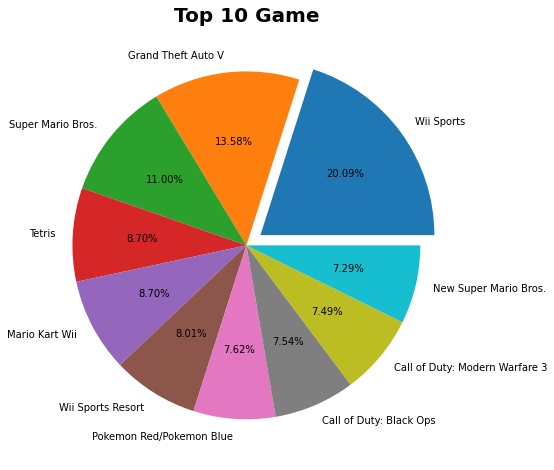

In [69]:
plt.figure(figsize = (10, 8))
explode = [0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(top_game['Sum_Sales'], labels = top_game['Name'], autopct = '%.2f%%', explode = explode)
plt.title("Top 10 Game", fontsize = 20, fontweight = 'bold')

In [41]:
top_genre = game.groupby('Genre').sum()['Sum_Sales'].sort_values(ascending = False).head(5).reset_index()
top_genre

,Genre,Sum_Sales
0,Action,1741.32
1,Sports,1327.04
2,Shooter,1035.90
3,Role-Playing,905.03
4,Platform,830.23


Text(0.5, 1.0, 'Top 5 Genre')

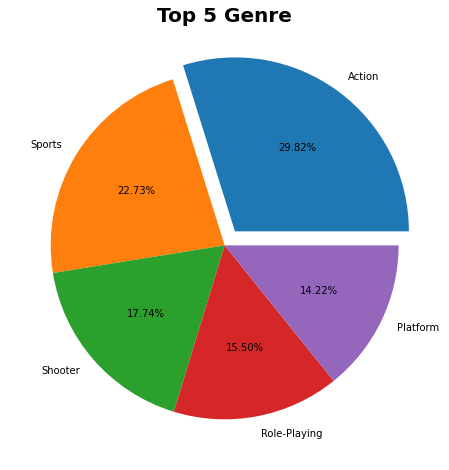

In [70]:
plt.figure(figsize = (10, 8))
explode = [0.10, 0, 0, 0, 0]
plt.pie(top_genre['Sum_Sales'], labels = top_genre['Genre'], autopct = '%.2f%%', explode = explode)
plt.title("Top 5 Genre", fontsize = 20, fontweight = 'bold')

# 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론

In [89]:
import scipy.stats

지역
- 가장 높은 출고량을 나타내는 북미지역을 메인 타겟으로 출시
- 지역에 따라 선호하는 게임 장르가 유사하므로 다른 지역에서도 높은 출고량 예측 가능

지역과 출고량의 상관관계 </br>
귀무가설 : 지역과 출고량은 상관이 없을 것이다. </br>
대립가설 : 지역과 출고량은 상관이 있을 것이다.

In [99]:
game.loc[:, ['Genre', 'Sum_Sales']]

,Genre,Sum_Sales
1,Action,0.04
2,Action,0.18
3,Adventure,0.02
4,Misc,0.04
5,Platform,0.25
...,...,...
16594,Platform,0.20
16595,Action,0.01
16596,Sports,0.79
16597,Action,0.38


연도
- 가장 높은 출고량이 나타나는 2005년 ~ 2010년 사이에 인기있던 장르인 Action, Sports, Shooter를 메인 장르로 결정

연도와 출고량의 상관관계 </br>
귀무가설 : 연도와 출고량은 상관이 없을 것이다. </br>
대립가설 : 연도와 출고량은 상관이 있을 것이다.

In [98]:
chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(game.loc[:, ['Year', 'Sum_Sales']])
pvalue

0.0

pvalue가 0.05보다 작으므로 귀무가설을 기각할 수 있음 -> 연도와 출고량은 상관이 있다.

인기
- 가장 인기있는 게임인 Wii Sports를 메인 게임으로 결정
- Top 10 게임의 경우 큰 차이가 없어 모두 출시 가능
- 가장 인기있는 장르인 Action을 메인 장르로 결정
- Action과 함께 상위권 장르인 Sports, Shooter 장르의 게임도 출시 가능